In [14]:
#implementation of the KNN algorithm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#importing the custome data handler
from data_handler.data_handler import DataHandler
from grid_search import *
from bayes_search import *

The `KNN` class implements the K-Nearest Neighbors algorithm with methods for 
data loading, training, prediction, and evaluation. 
It uses a custom `DataHandler` for managing data and a Scikit-learn KNN model.
Key methods include `train()`, `predict()`, `evaluate()`, and `plot_confusion_matrix()`.

In [15]:
#class for the KNN algorithm
class KNN():
    def __init__(self,K=3):
        self.K=K 
        self.model = KNeighborsClassifier(n_neighbors=self.K)
        self.data_handler = DataHandler()
    
    #loads the training data from the data handler as features and targets from the cleaned training data
    def load_train_data(self):
        self.train_features,self.train_targets = self.data_handler.split_data(self.data_handler.train_data)
    
    #loads the validation data from the data handler as features and targets from the cleaned validation data
    def load_validation_data(self):
        self.validation_features,self.validation_targets = self.data_handler.split_data(self.data_handler.validation_data)
    
    #loads the test data from the data handler as features and targets from the cleaned test data
    def load_test_data(self):
        self.test_features,self.test_targets = self.data_handler.split_data(self.data_handler.test_data)
    
    #trains the model on the training data
    def train(self):
        self.model.fit(self.train_features,self.train_targets)
    
    #predict the target for given features and returns the predicted targets use to predict the test data
    def predict(self,features):
        return self.model.predict(features)
    
    #evaluates the model on the validation data
    def evaluate(self,DataFlag="Validation"):
        if DataFlag=="Validation":
            features = self.validation_features
            targets = self.validation_targets
        elif DataFlag=="Test":
            features = self.test_features
            targets = self.test_targets
        predictions = self.predict(features)
        print("Accuracy: ",accuracy_score(targets,predictions))
        print("Classification Report: ",classification_report(targets,predictions))
        print("Confusion Matrix: ",confusion_matrix(targets,predictions))
        self.plot_confusion_matrix(targets,predictions,DataFlag)

    #plot confusion matrix
    def plot_confusion_matrix(self,targets,predictions,dataFlag):
        cm = confusion_matrix(targets, predictions) 
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for {} data".format(dataFlag))
        plt.show()



### Creating a basic model with default parameters

In [16]:
print("Creating a basic KNN model with default parameters")
knn=KNN(K=3)
#load training data
knn.load_train_data()
#train model
knn.train()
#load validation data
knn.load_validation_data()

Creating a basic KNN model with default parameters


Evaluating model on the validation dataset
Accuracy:  0.7752808988764045
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.78      0.82        58
           1       0.65      0.77      0.71        31

    accuracy                           0.78        89
   macro avg       0.76      0.78      0.76        89
weighted avg       0.79      0.78      0.78        89

Confusion Matrix:  [[45 13]
 [ 7 24]]


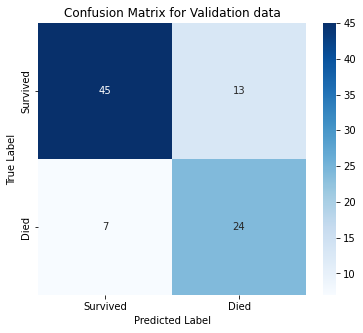

In [17]:
#evaluate model on validation data
print("Evaluating model on the validation dataset")
knn.evaluate(DataFlag="Validation")

Evaluating model on the test dataset
Accuracy:  0.7640449438202247
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.80      0.81       109
           1       0.69      0.71      0.70        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.77      0.76      0.76       178

Confusion Matrix:  [[87 22]
 [20 49]]


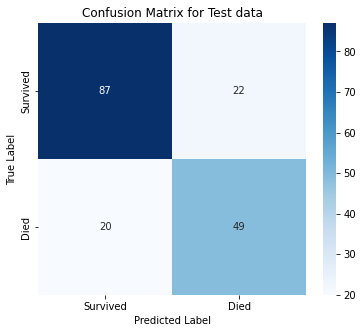

In [18]:
#load test data
knn.load_test_data()
#evaluate model on test data
print("Evaluating model on the test dataset")
knn.evaluate(DataFlag="Test")

### Performing model tuning to find optimal K

Applying Grid search to tune the K hyperparameter of the model
Trying K=1
Trying K=2
Trying K=3
Trying K=4
Trying K=5
Trying K=6
Trying K=7
Trying K=8
Trying K=9
Trying K=10
Trying K=11
Trying K=12
Trying K=13
Trying K=14
Trying K=15
Trying K=16
Trying K=17
Trying K=18
Trying K=19
Trying K=20
Trying K=21
Trying K=22
Trying K=23
Trying K=24
Trying K=25
Trying K=26
Trying K=27
Trying K=28
Trying K=29


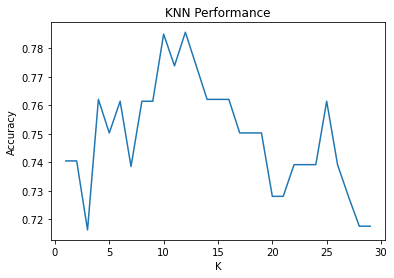

In [19]:
gs=GridSearch()
bs=BayesianSearch()
print("Applying Grid search to tune the K hyperparameter of the model")
result_gs=gs.tune_knn(x_train=knn.validation_features,y_train=knn.validation_targets,plot=True)

In [20]:
print("Applying Bayesian search to tune the K hyperparameter of the model")
result_bs=bs.tune_knn(x_train=knn.validation_features,y_train=knn.validation_targets)

Applying Bayesian search to tune the K hyperparameter of the model


In [21]:
print("Grid Search Results: ",result_gs)
print("Bayesian Search Results: ",result_bs)

Grid Search Results:  (12, 0.7856209150326798)
Bayesian Search Results:  (12, 0.7856209150326798)


### New model with optimal K and checking accuracy on validation and test data

In [22]:
print("Creating a new KNN model with the tunned K parameter for max accuracy")
new_knn=KNN(K=12)
new_knn.load_train_data()
new_knn.train()


Creating a new KNN model with the tunned K parameter for max accuracy


Evaluating optimized model on the validation dataset
Accuracy:  0.8089887640449438
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.86      0.85        58
           1       0.73      0.71      0.72        31

    accuracy                           0.81        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89

Confusion Matrix:  [[50  8]
 [ 9 22]]


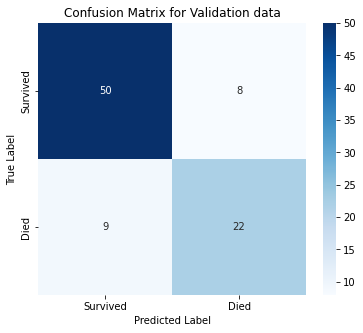

In [23]:
new_knn.load_validation_data()
print("Evaluating optimized model on the validation dataset")
new_knn.evaluate(DataFlag="Validation")

Evaluating optimized model on the test dataset
Accuracy:  0.7808988764044944
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.77      0.62      0.69        69

    accuracy                           0.78       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.78      0.78      0.78       178

Confusion Matrix:  [[96 13]
 [26 43]]


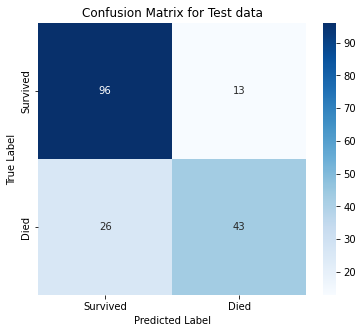

In [24]:
new_knn.load_test_data()
print("Evaluating optimized model on the test dataset")
new_knn.evaluate(DataFlag="Test")